In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# Audio Processing
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

## Data Preparation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

## Dataset

In [2]:
TESS = "dataset/tess/"
RAV = "dataset/ravdess/"
SAVEE = "dataset/savee/ALL/"
CREMA = "dataset/crema/"

### SAVEE

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,dataset/savee/ALL/DC_a01.wav
1,angry,dataset/savee/ALL/DC_a02.wav
2,angry,dataset/savee/ALL/DC_a03.wav
3,angry,dataset/savee/ALL/DC_a04.wav
4,angry,dataset/savee/ALL/DC_a05.wav


### TESS

In [4]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,dataset/tess/OAF_angry/OAF_back_angry.wav
1,angry,dataset/tess/OAF_angry/OAF_bar_angry.wav
2,angry,dataset/tess/OAF_angry/OAF_base_angry.wav
3,angry,dataset/tess/OAF_angry/OAF_bath_angry.wav
4,angry,dataset/tess/OAF_angry/OAF_bean_angry.wav


### RAVDESS

In [5]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,dataset/ravdess/Actor_02/03-01-01-01-01-01-02.wav
1,neutral,dataset/ravdess/Actor_02/03-01-01-01-01-02-02.wav
2,neutral,dataset/ravdess/Actor_02/03-01-01-01-02-01-02.wav
3,neutral,dataset/ravdess/Actor_02/03-01-01-01-02-02-02.wav
4,calm,dataset/ravdess/Actor_02/03-01-02-01-01-01-02.wav


In [6]:
RavMales_df.head()

,labels,path
0,neutral,dataset/ravdess/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,dataset/ravdess/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,dataset/ravdess/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,dataset/ravdess/Actor_01/03-01-01-01-02-02-01.wav
4,calm,dataset/ravdess/Actor_01/03-01-02-01-01-01-01.wav


### CREMA

In [7]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,labels,path
0,angry,dataset/crema//1002_DFA_ANG_XX.wav
1,disgust,dataset/crema//1002_DFA_DIS_XX.wav
2,fear,dataset/crema//1002_DFA_FEA_XX.wav
3,happy,dataset/crema//1002_DFA_HAP_XX.wav
4,neutral,dataset/crema//1002_DFA_NEU_XX.wav


In [8]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

### Data Augmentation

In [9]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

### Feature Extraction

In [10]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [ ]:
female_X, female_Y = [], []
for path, emotion in zip(Females.path, Females.labels):
    features = get_features(path)
    #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
    for elem in features: 
        female_X.append(elem)        
        female_Y.append(emotion)

male_X, male_Y = [], []
for path, emotion in zip(Males.path, Males.labels):
    features = get_features(path)
    for elem in features:
        male_X.append(elem)
        male_Y.append(emotion)
    
print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

C:\Users\ASWIN\AppData\Local\Temp/ipykernel_8872/1046209821.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\ASWIN\AppData\Local\Temp/ipykernel_8872/1046209821.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
C:\Users\ASWIN\AppData\Local\Temp/ipykernel_8872/1046209821.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


In [14]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [15]:
Females_Features = setup_dataframe('Female', female_X, female_Y)
Males_Features = setup_dataframe('Male', male_X, male_Y)

Female dataframe
Male dataframe


### Data Preparation 

In [16]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [19]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

### Splitting Data

In [21]:
X = np.concatenate((female_X, male_X))
Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [22]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

### Modelling

In [23]:
## To check if a system has the necessary GPU resources available to train our large models
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [25]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        return model

In [26]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

In [27]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [29]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Averag  (None, 8, 128)           0

In [30]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
2129/2129 [==============================] - 20s 9ms/step - loss: 1.4118 - accuracy: 0.4354 - val_loss: 1.1429 - val_accuracy: 0.5470 - lr: 0.0010
Epoch 2/75
2129/2129 [==============================] - 18s 8ms/step - loss: 1.1826 - accuracy: 0.5317 - val_loss: 1.1495 - val_accuracy: 0.5332 - lr: 0.0010
Epoch 3/75
2129/2129 [==============================] - 18s 8ms/step - loss: 1.1084 - accuracy: 0.5587 - val_loss: 1.0457 - val_accuracy: 0.5885 - lr: 0.0010
Epoch 4/75
2129/2129 [==============================] - 18s 8ms/step - loss: 1.0555 - accuracy: 0.5825 - val_loss: 0.9537 - val_accuracy: 0.6278 - lr: 0.0010
Epoch 5/75
2129/2129 [==============================] - 18s 8ms/step - loss: 1.0100 - accuracy: 0.6033 - val_loss: 0.9334 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 6/75
2129/2129 [==============================] - 18s 8ms/step - loss: 0.9631 - accuracy: 0.6221 - val_loss: 0.8809 - val_accuracy: 0.6521 - lr: 0.0010
Epoch 7/75
2129/2129 [==============================

In [31]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

In [32]:
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 97.15%
Mixed-gender emotions testing Accuracy: 88.35%


In [128]:
predall_test = total_model.predict(x_test)
predall_test[:20]

533/533 [==============================] - 3s 6ms/step


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.11790567e-37, 0.00000000e+00, 1.29304271e-26, 3.69142367e-28,
        6.87669191e-32, 3.57447831e-37, 1.12302738e-37, 1.00000000e+00],
       [2.78647669e-04, 2.37627785e-21, 6.54141419e-04, 2.05127046e-01,
        7.86685586e-01, 1.90544652e-03, 5.34675270e-03, 2.37702579e-06],
       [8.22684050e-01, 0.00000000e+00, 1.19568085e-05, 1.59002706e-01,
        1.83010306e-02, 5.46010135e-08, 4.82059050e-08, 1.89219108e-07],
       [1.57505216e-03, 9.10766022e-17, 9.94247794e-01, 9.58542980e-04,
        3.87408450e-04, 1.02957897e-03, 1.80164073e-03, 4.80251714e-08],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.72194830e-04, 7.67619769e-31, 7.18957817e-05, 4.28601056e-01,
        5.70302904e-01, 8.59861666e-06, 4.31185690e-05, 2.

In [29]:
# predicting on test data.
predall_test = model.predict(x_test)
y_predall = encoder.inverse_transform(predall_test)
y_testall = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_predall.flatten()
df['Actual Labels'] = y_testall.flatten()

df.head(20)

533/533 [==============================] - 3s 6ms/step


,Predicted Labels,Actual Labels
0,disgust,angry
1,disgust,surprise
2,disgust,fear
3,happy,fear
4,disgust,disgust
5,disgust,angry
6,disgust,happy
7,disgust,neutral
8,disgust,fear
9,disgust,neutral


In [34]:
print(classification_report(y_testall, y_predall))

              precision    recall  f1-score   support

       angry       0.89      0.94      0.92      2707
        calm       0.93      0.94      0.94       273
     disgust       0.87      0.86      0.87      2745
        fear       0.87      0.87      0.87      2642
       happy       0.87      0.86      0.86      2686
     neutral       0.89      0.86      0.87      2428
         sad       0.88      0.87      0.88      2684
    surprise       0.96      0.96      0.96       862

    accuracy                           0.88     17027
   macro avg       0.90      0.90      0.90     17027
weighted avg       0.88      0.88      0.88     17027



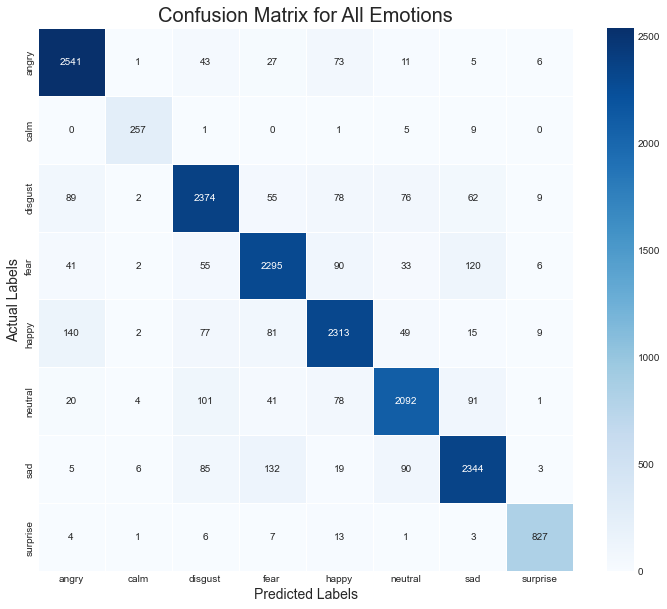

In [35]:
cm = confusion_matrix(y_testall, y_predall)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for All Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

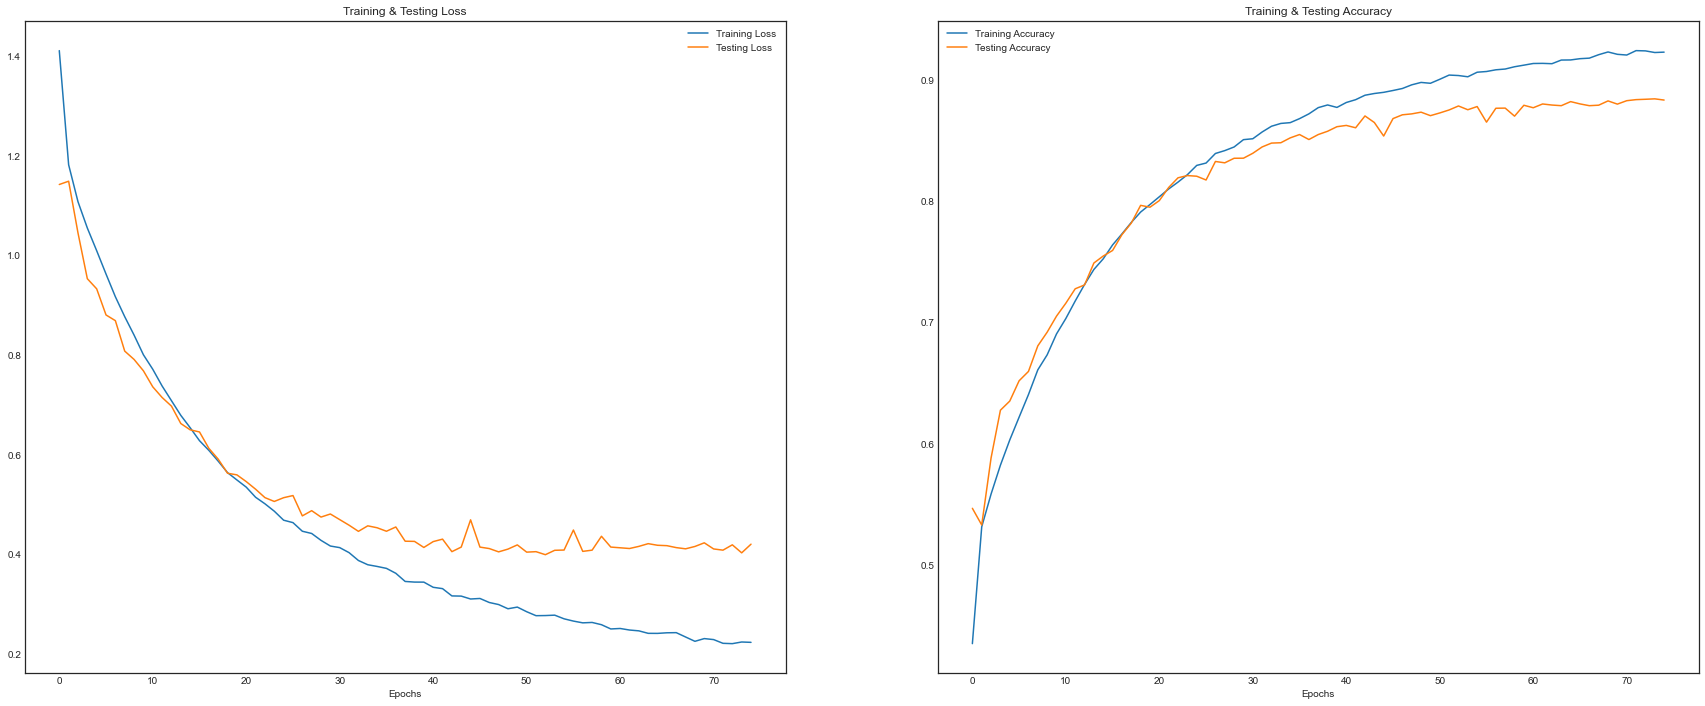

In [36]:
show_graphs(history)

In [38]:
# Save Model
total_model.save('models/modelV2.h5')

### Inference

In [2]:
# Load Model
model = load_model('models/modelV2.h5')

In [3]:
data, sample_rate = librosa.load('happy.wav', duration=3, offset=0.5, res_type='kaiser_fast')

classes = {0:'Angry', 1:'Calm', 2:'Disgust', 3:'Fear', 4:'Happy', 5:'Neutral', 6:'Sad', 7:'Surprise'}

result = np.array([])
mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
mfccs_processed = np.mean(mfccs.T,axis=0)
result = np.array(mfccs_processed)

preds = model(result.reshape(1, 58, 1))
pred = classes[np.argmax(preds)]
pred

'Sad'

In [4]:
mal_path = 'Male_features.csv'
fem_path = 'Female_features.csv'

Males_Features = pd.read_csv(mal_path)
Females_Features = pd.read_csv(fem_path)

In [5]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values
male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

encoder = OneHotEncoder()
female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

X = np.concatenate((female_X, male_X))
Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [6]:
def extract_features(data):
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
    
    return result

In [7]:
result = []

for i in range(10):
    result.append(extract_features(x_test[i]))

C:\Users\ASWIN\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=58
  return f(*args, **kwargs)


In [8]:
result = np.array(result)
result.shape

(10, 58)

In [9]:
for i in range(10):
    preds = model(result[i].reshape(1, 58, 1))
    pred = classes[np.argmax(preds)]
    print(pred)

Disgust
Disgust
Disgust
Happy
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust


In [12]:
predictions = model.predict(result[0].reshape(1, 58, 1))
predictions = np.argmax(predictions)
classes[predictions]

1/1 [==============================] - 0s 49ms/step


'Disgust'